<a href="https://colab.research.google.com/github/islammostafa99/Assignment3_datamining/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -cq https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [3]:
!tar -xvf /content/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [4]:
import pandas as pd
import os

In [5]:
# If statement prevents doing all this if the csvs already exist
if not (os.path.isfile('data/reviews_train.csv' and 'data/reviews_test.csv')):
    path = '/content/aclImdb' 
    train_text = []
    train_label = []
    test_text = []
    test_label = []
    train_data_path_pos = os.path.join(path,'train/pos/')
    train_data_path_neg = os.path.join(path,'train/neg/')

    for data in ['train','test']:
        for label in ['pos','neg']:
            for file in sorted(os.listdir(os.path.join(path,data,label))):
                if file.endswith('.txt'):
                    with open(os.path.join(path,data,label,file)) as file_data:
                        if data=='train':
                            train_text.append(file_data.read())
                            train_label.append( 1 if label== 'pos' else 0)
                        else :
                            test_text.append(file_data.read())
                            test_label.append( 1 if label== 'pos' else 0)

    train_df = pd.DataFrame({'Review': train_text, 'Label': train_label})
    test_df = pd.DataFrame({'Review': test_text, 'Label': test_label})
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    test_df = test_df.sample(frac=1).reset_index(drop=True)
    
    train_df.to_csv('reviews_train.csv')
    test_df.to_csv('reviews_test.csv')

# Else statement reads in csvs if they've been prepared
else:
    train_df = pd.read_csv("reviews_train.csv", index_col=0)
    test_df = pd.read_csv("reviews_test.csv", index_col=0)

In [6]:
print(train_df.shape)
print(test_df.shape)

(25000, 2)
(25000, 2)


In [7]:
#checking for nulls in training data  --> no nulls
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


,Review,Label
0,"The original ""les visiteurs"" was original, hil...",0
1,There isn't a whole lot going on in this story...,1
2,This slick and gritty film consistently delive...,1
3,I must admit that this is the type of film tha...,1
4,"The word ""1st"" in the title has more ominous m...",0


In [8]:
#checking for nulls in testing data --> no nulls
print(test_df.info())
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


,Review,Label
0,"It's probably a cultural thing---somehow, the ...",0
1,"The film tells upon the title role,Danton(Gera...",1
2,Andaz Apna Apna is my favorite comedy movie of...,1
3,I recommend that movie viewers if in the New Y...,1
4,I just checked out Northanger Abbey from the l...,1


In [9]:
# Creating csvs without nulls
train_df.to_csv('clean_train.csv')
test_df.to_csv('clean_test.csv')

In [10]:
!pip install --user -U nltk

     |████████████████████████████████| 1.5 MB 30.2 MB/s 
     |████████████████████████████████| 749 kB 48.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df = pd.read_csv('clean_train.csv')
df2 = pd.read_csv('clean_test.csv')

In [13]:
df.head()

,Unnamed: 0,Review,Label
0,0,"The original ""les visiteurs"" was original, hil...",0
1,1,There isn't a whole lot going on in this story...,1
2,2,This slick and gritty film consistently delive...,1
3,3,I must admit that this is the type of film tha...,1
4,4,"The word ""1st"" in the title has more ominous m...",0


In [14]:
#seperate the target
target = df['Label']
target2 = df2['Label']

In [15]:
target

0        0
1        1
2        1
3        1
4        0
        ..
24995    0
24996    0
24997    1
24998    0
24999    1
Name: Label, Length: 25000, dtype: int64

In [16]:
target2

0        0
1        1
2        1
3        1
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: Label, Length: 25000, dtype: int64

In [17]:
#remove the target and review number
df.drop(['Label', 'Unnamed: 0'], axis=1, inplace=True)

df2.drop(['Label', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,Review
0,"The original ""les visiteurs"" was original, hil..."
1,There isn't a whole lot going on in this story...
2,This slick and gritty film consistently delive...
3,I must admit that this is the type of film tha...
4,"The word ""1st"" in the title has more ominous m..."


In [18]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [24]:
df['clean_review'] = df["Review"].apply(lambda x: clean_text(x))


In [25]:
df.drop(["Review"], axis=1, inplace=True)
df.transpose()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24960,24961,24962,24963,24964,24965,24966,24967,24968,24969,24970,24971,24972,24973,24974,24975,24976,24977,24978,24979,24980,24981,24982,24983,24984,24985,24986,24987,24988,24989,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
clean_review,original le visiteurs original hilarious inter...,whole lot go story two men employ different wa...,slick gritty film consistently deliver one fra...,must admit type film would normally eschew ren...,word title ominous mean viewer film crime vict...,movie pull deeply two main character pop lapto...,steve irwin admire man willing throw river cle...,chinese movie make feel many similarity member...,say say film awful whole chineseness awaken an...,spoiler br br saw film year back lovely story ...,i've read comment agree one get end think go r...,turn another failed attempt laughable sci-fi c...,movie badly write character depth never make m...,scarecrow one film little acting little direct...,sky captain possibly best awful movie i've see...,aside classic aspect cheesy line terrible act ...,since crouch tiger hidden dragon come along th...,"anyone see shine',scott hick film heartbreakin...",abysmal piece story-telling hour movie much id...,imagine could bring thing back life one touch ...,year old virgin exist world understand world e...,refresh lose gem feature effective dialog comb...,kurt russell's chameleon-like performance coup...,actually movie silly moment claymation part jo...,h.g well past prime book survive long go comin...,rent movie come video tape really enjoyed oppo...,okay i've always fan batman love animated seri...,know power-rangers gimmick cater year old real...,another reason watch delightful movie florence...,even film allegedly joke response critic still...,movie run minute nothing good television decid...,borrow movie despite extremely low rating want...,let's face lame kid die soul transfer scarecro...,okay let start say nothing come surprise anyon...,though begin read classic literature never lat...,go movie read drama man supernatural gift make...,like like like animated series love fact make ...,first part brd trilogy passion plot density lo...,film bad film ever view like homework assignme...,film make want see especially liked way end se...,...,title like attack killer tomatoes anyone go th...,red rock west br nicolas cage get embroil dead...,basic plot movie bad lady make big come back a...,hood live dead young scientist name rick live ...,i'm sorry jean good original movie follow perh...,dear richard know love home improvement tim al...,wife finish movie come onto imdb commiserate r...,story comprises premise character conflict cha...,i'm kid summary vote video distributor package...,hop anything new choose wrong movie think movi...,ivan reitman something savior tired plot ghost...,good earth great movie hear much anymore lot b...,cannot believe guy direct crap dracula dracula...,raise victor vargas fail terribly try real unf...,saw big bad swim temecula film festival totall...,really look forward see nana see renoir amaze ...,die all.this film great cast lot lot romance t...,make movie timothy olyphant shirtless several ...,grey garden world unto edith little edie live ...,watch part twice enjoy story enjoy see old pat...,death george nader february thought interest p...,pretty crazy whodunit feature black cast try f...,american nightmare officially tied opinion pat...,love movie bias see huge disney fan really enj...,"wish could say show unusual banality,but usual...",dog go heaven one best movie i've ever see fir...,could well definitive film noir time columbia ...,love shatter make another season wish would be...,okay...so i've see lot really odd/unusual movi...,normally i'm motivate write review movie excru...,"watch movie friday,apr see last scene cos talk...",film seem completely pointless reason anything...,psychiatrist specializ

In [26]:
import numpy as np

flat_arr = np. reshape(df.to_numpy(), 25000)
print(flat_arr)


['original le visiteurs original hilarious interest balance near perfect must candidate bad first sequel really good film everyone keep shout gag work first repeat another time vague hope eventually become funny horrible parody except course parody inventive love see film see'
 'whole lot go story two men employ different way handle memory vietnam lack premise make act realism quiet film bond friendship share experience even get romance gratuitous another real piece story well worth see'
 "slick gritty film consistently deliver one frankenheimer's best underrated film easily best elmore leonard adaptation date scratch head think love get shorty need punch face opinion one capture feel leonard's character well john glover pick-up relocation story detroit novel hollywood film elevate story's sleaze factor amaze height man beer watch movie reference purpose favorite leonard book swag rum punch cat chaser city primeval pick-up favorite frankenheimer film include second manchurian candidate

In [27]:
df2['clean_review'] = df2["Review"].apply(lambda x: clean_text(x))
df2

,Review,clean_review
0,"It's probably a cultural thing---somehow, the ...",probably cultural thing---somehow native count...
1,"The film tells upon the title role,Danton(Gera...","film tell upon title role,danton(gerard depard..."
2,Andaz Apna Apna is my favorite comedy movie of...,andaz apna apna favorite comedy movie time.bot...
3,I recommend that movie viewers if in the New Y...,recommend movie viewer new york city area go i...
4,I just checked out Northanger Abbey from the l...,check northanger abbey local library expect mu...
...,...,...
24995,I finished watching Mandy Lane about an hour a...,finish watch mandy lane hour ago felt urge com...
24996,With a cast of mostly lesser-tiered stars (Ala...,cast mostly lesser-tiered star alain delon rob...
24997,I managed to see this at what I think was the ...,manage see think second screening world day op...
24998,Earth has been destroyed in a nuclear holocaus...,earth destroy nuclear holocaust well part eart...


In [28]:
df2.drop(["Review"], axis=1, inplace=True)
df2.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,24960,24961,24962,24963,24964,24965,24966,24967,24968,24969,24970,24971,24972,24973,24974,24975,24976,24977,24978,24979,24980,24981,24982,24983,24984,24985,24986,24987,24988,24989,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
clean_review,probably cultural thing---somehow native count...,"film tell upon title role,danton(gerard depard...",andaz apna apna favorite comedy movie time.bot...,recommend movie viewer new york city area go i...,check northanger abbey local library expect mu...,world rule economical interest great corporati...,spoiler spoiler earth four)<br br mark piznars...,spoilers<br br love movie i've see lot movie t...,oh remember watch show p.m junior high day ple...,icky flix excellent start point anybody even v...,opportunity see nuovomondo hitherto know u.s g...,review main page admits movie horrible forgive...,mystery solution great noir conceit question t...,say sign film appeal age somebody right shield...,utterly useless do subject matter say capture ...,move film take new twist somewhere we've relat...,begin sit ready laugh bit blown away movie per...,line good summary movie read watch minute movi...,highly recommend movie everyone son read book ...,shame quality actor like baldwin booth succumb...,science fiction fan early childhood long time ...,spoiler movie problem end get message across l...,horror picture set ultimately parody still pla...,best year live film slip radar years--i heard ...,main criticism quite simply long enough detail...,easy movie try suspenseful wind merely uninter...,brainchild comic strip pioneer alex raymond fl...,believe even waste netflix rental complete pie...,great horror film people want vomit-retching g...,nemesis bad movie ever see think nemesis minut...,movie consider academy award enjoy movie take ...,joseph conrad's novel heart darkness dark prof...,bad movie bad movie original that's good thing...,say good polly bergen fine film.the rest i'm g...,box one strangest movie ever see explain exper...,generally love type movie however time find wa...,simply another bad chuck norris movie norris p...,film come gift late-night offering blue unlike...,anybody think film great desperately need head...,nothing else tv yesterday afternoon think okay...,...,notable act debut future big-time hollywood st...,br br excellent think back long time find film...,first two hour televise version full character...,little girl absolutely adore swan princess rel...,story document rise china's first emperor effo...,eighth thus second-to-last short animatrix one...,man pull london street take foreign country to...,flash gordon first rate serial know goofs howe...,think movie get really cool music never get he...,fulci one time favorite italian splatter direc...,bad concept.i wish take another direction movi...,eh-heh eh-heh hey dude look alien they're like...,movie mild try expect anything great film stil...,romuald et juliette one french romantic comedy...,movie use play constantly disney channel bit y...,"simply watched movie sarah also give star her,...",happen often occasionally one man make differe...,although recommend film neither recommend read...,centerpiece lackawanna blue character rachel n...,huge street fighter fan thoroughly enjoy previ...,i've watch lot asian horror movie lately one b...,movie visually graceful interest mainly plot f...,essential view anyone watch tv news may help b...,australian currently live japan saw movie tv i...,contains spoilers<br br luchino visconti's fil...,surely film hack studio perhaps feel serious f...,first saw film late try see every time come tv...,would give movie laugh hard many time give lit...,fun romp...a lot good twist turn even baked!)<...,definitely movie make think everyday struggle ...,watch show much little think watch episode rai...,watch movie get increasingly bore silly plot g...,rent movie huge dudikoff

In [29]:
flat_arr2 = np. reshape(df2.to_numpy(), 25000)
print(flat_arr2)

['probably cultural thing---somehow native country condition find stuff funny experience phenomenon first-hand open-air cinema event film show feature indigenous audience laugh sanitarium clinic retard child well-to-do area audience consist mostly educate adults.<br br must possible somehow find amusing honest goodness idea takes---maybe air water prolong exposure cause condition something must cause obviously thing say quite sure cause movie itself.<br br joke brain dead stupid nonsensical unfunny lame short waste time tom jerry funnier heck even funeral funnier.<br br case fortunate enough ever see stooge performance three guy behave run even talk like retarded infant cause kind unfunny mayhem plot real purpose real conclusion like ugly teletubbies without cute costumes.<br br sit crowd watching garbage country quite exasperate feel like party bunch potheads one smoke anything.<br br unless prepared intoxicate make bearable come equip whatever make people think watch three ugly old m

In [30]:
#vectorization to create data matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_matrix = vectorizer.fit_transform(flat_arr)
test_matrix = vectorizer.transform(flat_arr2)


In [31]:
train_matrix

<25000x66228 sparse matrix of type '<class 'numpy.int64'>'
	with 2413035 stored elements in Compressed Sparse Row format>

In [32]:
print(train_matrix)

  (0, 41692)	2
  (0, 33252)	1
  (0, 63223)	1
  (0, 26683)	1
  (0, 29497)	1
  (0, 4152)	1
  (0, 39712)	1
  (0, 43430)	1
  (0, 39173)	1
  (0, 8370)	1
  (0, 4018)	1
  (0, 21080)	2
  (0, 51882)	1
  (0, 47473)	1
  (0, 24052)	1
  (0, 20884)	2
  (0, 19323)	1
  (0, 31539)	1
  (0, 52743)	1
  (0, 22666)	1
  (0, 65091)	1
  (0, 48371)	1
  (0, 2219)	1
  (0, 58946)	1
  (0, 62391)	1
  :	:
  (24999, 48247)	1
  (24999, 62250)	1
  (24999, 59026)	1
  (24999, 22266)	1
  (24999, 16769)	1
  (24999, 44118)	1
  (24999, 64306)	1
  (24999, 61377)	1
  (24999, 35232)	1
  (24999, 11405)	1
  (24999, 39982)	1
  (24999, 51221)	1
  (24999, 27995)	1
  (24999, 39527)	1
  (24999, 15893)	1
  (24999, 26881)	1
  (24999, 37491)	1
  (24999, 64191)	1
  (24999, 56220)	1
  (24999, 22799)	1
  (24999, 35233)	1
  (24999, 65678)	4
  (24999, 57495)	1
  (24999, 31964)	1
  (24999, 31407)	1


In [33]:
test_matrix

<25000x66228 sparse matrix of type '<class 'numpy.int64'>'
	with 2323424 stored elements in Compressed Sparse Row format>

In [34]:
print(test_matrix)

  (0, 721)	1
  (0, 761)	1
  (0, 1102)	2
  (0, 1864)	1
  (0, 2387)	1
  (0, 2758)	1
  (0, 3518)	2
  (0, 3780)	1
  (0, 4791)	1
  (0, 5017)	2
  (0, 6899)	10
  (0, 6936)	1
  (0, 7737)	1
  (0, 8811)	1
  (0, 9025)	4
  (0, 9837)	1
  (0, 10210)	1
  (0, 10578)	1
  (0, 11115)	1
  (0, 11522)	1
  (0, 11562)	2
  (0, 11826)	1
  (0, 12443)	1
  (0, 12525)	2
  (0, 13054)	1
  :	:
  (24999, 39992)	1
  (24999, 40414)	1
  (24999, 41022)	1
  (24999, 41384)	2
  (24999, 41820)	1
  (24999, 44030)	1
  (24999, 44287)	1
  (24999, 44796)	1
  (24999, 45672)	3
  (24999, 47396)	1
  (24999, 47455)	1
  (24999, 47457)	2
  (24999, 48709)	1
  (24999, 51796)	1
  (24999, 54076)	1
  (24999, 54573)	2
  (24999, 54966)	1
  (24999, 55818)	1
  (24999, 58946)	1
  (24999, 59664)	1
  (24999, 61234)	1
  (24999, 63221)	1
  (24999, 64115)	1
  (24999, 64377)	1
  (24999, 65562)	1


In [35]:
train_x = []

In [36]:
import re

for i in flat_arr:
     split_sentence = i.split(' ')
     train_x.append(split_sentence)

In [37]:
#use Gensim library for obtaining fasttext word embedding
from gensim.models import FastText
model = FastText(size=300)
model.build_vocab(train_x)
# train the model
model.train(
    train_x, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)
wv = model.wv

In [38]:
print(wv.get_vector(train_x[0][0]))

[ 2.05671772e-01  3.79088134e-01 -7.25632235e-02  8.60281140e-02
 -5.74992672e-02  3.66464019e-01  1.98004339e-02 -3.84955853e-01
  3.61434251e-01  2.13528559e-01 -6.25828445e-01 -2.40063369e-01
  1.82157069e-01  3.13513249e-01 -1.12142038e+00  6.74248040e-01
 -4.41323340e-01  7.19426692e-01  4.04841214e-01 -3.48541290e-01
  3.35007459e-02 -5.07001802e-02  5.18949568e-01  4.18778099e-02
 -8.49490464e-02 -2.88844824e-01 -1.17468946e-01 -5.14251411e-01
  3.16361040e-01  4.87748422e-02  5.37185609e-01  3.69431287e-01
  3.23244721e-01  6.78850532e-01 -2.03671902e-01  1.80356398e-01
 -9.37520787e-02 -5.78290403e-01  1.70025066e-03  1.65403262e-01
 -7.06360221e-01  3.17902893e-01  3.30516025e-02  2.29939565e-01
 -1.88399389e-01  2.81555295e-01 -3.73652637e-01  6.14780188e-01
  7.13715404e-02  8.40871453e-01 -5.12960739e-02  1.63377732e-01
 -5.53459600e-02  1.23898037e-01 -7.14903325e-02  1.77399799e-01
 -1.03598766e-01  2.41976544e-01 -6.23534143e-01 -1.40534401e-01
  2.27029309e-01 -5.87153

In [39]:
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.linear_model import LogisticRegression

In [40]:
#KNN classifier
knnclassifier = KNeighborsClassifier(n_neighbors=80)
knnclassifier.fit(train_matrix , target)

KNeighborsClassifier(n_neighbors=80)

In [41]:
######
y_pred = knnclassifier.predict(test_matrix)

In [42]:
print(classification_report(target2 , y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66     12500
           1       0.66      0.65      0.65     12500

    accuracy                           0.66     25000
   macro avg       0.66      0.66      0.66     25000
weighted avg       0.66      0.66      0.66     25000



In [43]:
print(accuracy_score(target2, y_pred))

0.65636


In [44]:
#Naive bayes classifier

naivebayesclassifier= MultinomialNB(alpha= 50)


In [45]:
naivebayesclassifier.fit(train_matrix, target)

MultinomialNB(alpha=50)

In [46]:
####
y_pred = naivebayesclassifier.predict(test_matrix)
nr_correct = (target2 == naivebayesclassifier.predict(test_matrix)).sum()

In [47]:
print(f'{nr_correct} texts classified correctly')

20897 texts classified correctly


In [48]:
nr_incorrect = len(target2) - nr_correct

In [49]:
print(f'Number of texts classified incorrectly ia {nr_incorrect}')

Number of texts classified incorrectly ia 4103


In [50]:
fraction_wrong = nr_incorrect / (nr_correct + nr_incorrect)
print(f'The testing accuracy of the model is {1-fraction_wrong:0.2%}')

The testing accuracy of the model is 83.59%


In [51]:
print(accuracy_score(target2, y_pred))

0.83588


In [52]:
print(classification_report(target2 , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     12500
           1       0.86      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [53]:
#Random forest classifier

randomforestclassifier = RandomForestClassifier(n_estimators=200 , random_state=0)

In [54]:
randomforestclassifier.fit(train_matrix, target)

RandomForestClassifier(n_estimators=200, random_state=0)

In [55]:
#####
y_pred = randomforestclassifier.predict(test_matrix)

In [56]:
print(classification_report(target2, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12500
           1       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [57]:
print(accuracy_score(target2, y_pred))

0.85496


In [159]:
#evaluation of adaboostClassifier
scores = []
n_Estimators = [5,20,50,100,150,200,500]

In [190]:
#adapost---------------------
adamodel=AdaBoostClassifier(n_estimators=500,learning_rate=1)

In [191]:
model=adamodel.fit(train_matrix,target)

In [192]:
y_pred=model.predict(test_matrix)

In [193]:
from sklearn import metrics
print("accuracy",metrics.accuracy_score(target2,y_pred))

accuracy 0.85524


In [194]:
score = metrics.accuracy_score(target2,y_pred)
scores.append(score)

In [195]:
scores

[0.70348, 0.7656, 0.80064, 0.82952, 0.84088, 0.84656, 0.85524]

In [197]:
import seaborn as sns
import pandas as pd

In [198]:
dataframe = pd.DataFrame()
dataframe['n_estimators'] = n_Estimators
dataframe['score'] = scores
dataframe

,n_estimators,score
0,5,0.70348
1,20,0.76560
2,50,0.80064
3,100,0.82952
4,150,0.84088
5,200,0.84656
6,500,0.85524


In [199]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,n_estimators,score
0,5,0.703480
1,20,0.765600
2,50,0.800640
3,100,0.829520
4,150,0.840880
5,200,0.846560
6,500,0.855240


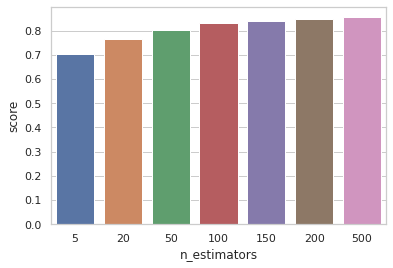

In [201]:
sns.set(style="whitegrid")
ax = sns.barplot(y="score", x="n_estimators", data=dataframe)

In [139]:
#linear svm classifier

#svmclassifier = SVC(kernel='linear')

In [63]:
#svmclassifier.fit(train_matrix, target)

In [64]:
#y_pred=svmclassifier.predict(test_matrix)

In [65]:
#print(classification_report(target2, y_pred))

In [213]:
#evaluation of logisticRegressionClassifier
scores = []
c= [0.5, 1 , 1.5 , 2 , 2.5 , 3]

In [245]:
#logistic regression

logistic_Regresiion = LogisticRegression(C=3)

In [246]:
logistic_Regresiion.fit(train_matrix, target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=3)

In [247]:
y_pred = logistic_Regresiion.predict(test_matrix)

In [248]:
print(classification_report(target2, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [249]:
print(accuracy_score(target2, y_pred))

0.85296


In [250]:
scores.append(accuracy_score(target2, y_pred))

In [251]:
scores

[0.86184, 0.85704, 0.85552, 0.85376, 0.85372, 0.85296]

In [252]:
import seaborn as sns

In [253]:
dataframe = pd.DataFrame()
dataframe['C'] = c
dataframe['score'] = scores
dataframe

,C,score
0,0.5,0.86184
1,1.0,0.85704
2,1.5,0.85552
3,2.0,0.85376
4,2.5,0.85372
5,3.0,0.85296


In [254]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,C,score
0,0.500000,0.861840
1,1.000000,0.857040
2,1.500000,0.855520
3,2.000000,0.853760
4,2.500000,0.853720
5,3.000000,0.852960


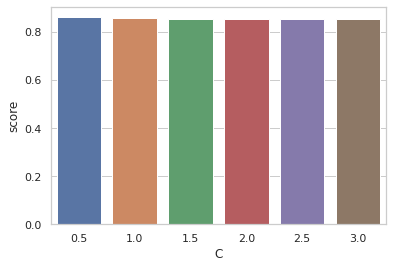

In [256]:
sns.set(style="whitegrid")
ax = sns.barplot(y="score", x="C", data=dataframe)

In [210]:
###evaluation
names = ["Nearest_Neighbors", "Random_Forest", "AdaBoost",
         "Naive_Bayes", "Logistic_Regression"]

classifiers = [
    KNeighborsClassifier(80),
    #SVC(kernel="linear"),
    RandomForestClassifier(n_estimators=200, random_state=0),
    AdaBoostClassifier(n_estimators=200,learning_rate=1),
    MultinomialNB(alpha=50),
    LogisticRegression()
  ]

knns= [1,3,5,7,10,50,80,100]  
n_Estimators = [5,20,50,100,150,200,500]
alphas=[1,5,10,20,50,100]
c= [0.5, 1 , 1.5 , 2 , 2.5 , 3]

In [72]:
#evaluation of knnclassifier
scores = []
for n in knns:
    classify=KNeighborsClassifier(n)
    classify.fit(train_matrix, target)
    score = classify.score(test_matrix, target2)
    scores.append(score)

In [73]:
scores

[0.5876, 0.60148, 0.61008, 0.61336, 0.61444, 0.65552, 0.65636, 0.6536]

In [74]:
import seaborn as sns

In [75]:
dataframe = pd.DataFrame()
dataframe['n_neighbours'] = knns
dataframe['score'] = scores
dataframe

,n_neighbours,score
0,1,0.58760
1,3,0.60148
2,5,0.61008
3,7,0.61336
4,10,0.61444
5,50,0.65552
6,80,0.65636
7,100,0.65360


In [76]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,n_neighbours,score
0,1,0.587600
1,3,0.601480
2,5,0.610080
3,7,0.613360
4,10,0.614440
5,50,0.655520
6,80,0.656360
7,100,0.653600


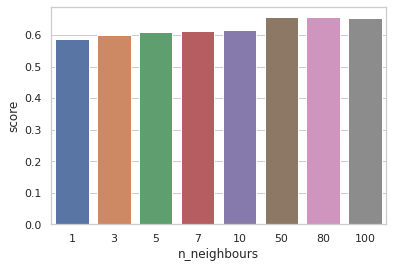

In [77]:
sns.set(style="whitegrid")
ax = sns.barplot(y="score", x="n_neighbours", data=dataframe)

In [79]:
#evaluation of randomForestClassifier
scores = []
for n in n_Estimators:
    classify=RandomForestClassifier(n, random_state=0)
    classify.fit(train_matrix, target)
    score = classify.score(test_matrix, target2)
    scores.append(score)

In [80]:
scores

[0.71, 0.79716, 0.83016, 0.8468, 0.85244, 0.85496, 0.8616]

In [81]:
import seaborn as sns

In [82]:
dataframe = pd.DataFrame()
dataframe['n_estimators'] = n_Estimators
dataframe['score'] = scores
dataframe

,n_estimators,score
0,5,0.71000
1,20,0.79716
2,50,0.83016
3,100,0.84680
4,150,0.85244
5,200,0.85496
6,500,0.86160


In [83]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,n_estimators,score
0,5,0.710000
1,20,0.797160
2,50,0.830160
3,100,0.846800
4,150,0.852440
5,200,0.854960
6,500,0.861600


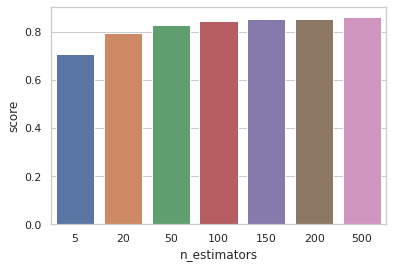

In [84]:
sns.set(style="whitegrid")
ax = sns.barplot(y="score", x="n_estimators", data=dataframe)

In [202]:
#evaluation of adaboostClassifier
#scores = []
#for n in n_estimators:
#    classify=AdaBoostClassifier(n)
#    classify.fit(train_matrix, target)
#    score = classify.score(test_matrix, target2)
#    scores.append(score)

In [89]:
#scores

In [90]:
#import seaborn as sns

In [91]:
#dataframe = pd.DataFrame()
#dataframe['n_estimators'] = n_Estimators
#dataframe['score'] = scores
#dataframe

In [92]:
#cm = sns.light_palette("green", as_cmap=True)
#s = dataframe.style.background_gradient(cmap=cm)
#s

In [93]:
#sns.set(style="whitegrid")
#ax = sns.barplot(y="score", x="n_estimators", data=dataframe)

In [96]:
#evaluation of naivebayesClassifier
scores = []
for n in alphas:
    classify=MultinomialNB(n)
    classify.fit(train_matrix, target)
    score = classify.score(test_matrix, target2)
    scores.append(score)

TypeError: ignored

In [ ]:
scores

[0.81784, 0.8276, 0.83112, 0.8342, 0.83588, 0.83576]

In [ ]:
import seaborn as sns

In [ ]:
dataframe = pd.DataFrame()
dataframe['alpha'] = alphas
dataframe['score'] = scores
dataframe

,alpha,score
0,1,0.81784
1,5,0.82760
2,10,0.83112
3,20,0.83420
4,50,0.83588
5,100,0.83576


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,alpha,score
0,1,0.817840
1,5,0.827600
2,10,0.831120
3,20,0.834200
4,50,0.835880
5,100,0.835760


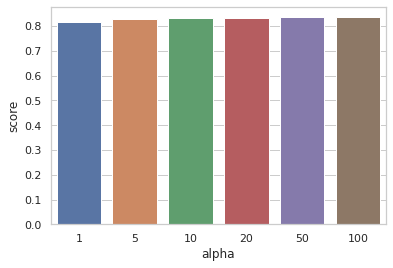

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="score", x="alpha", data=dataframe)

In [ ]:
###evaluation of classifiers
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_matrix, target)
    score = clf.score(test_matrix, target2)
    scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
scores

[0.65448, 0.85624, 0.84656, 0.83588, 0.85704]

In [ ]:
import seaborn as sns

In [ ]:
dataframe = pd.DataFrame()
dataframe['name'] = names
dataframe['score'] = scores
dataframe

,name,score
0,Nearest_Neighbors,0.65448
1,Random_Forest,0.85624
2,AdaBoost,0.84656
3,Naive_Bayes,0.83588
4,Logistic_Regression,0.85704


In [ ]:
cm = sns.light_palette("green", as_cmap=True)
s = dataframe.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.654480
1,Random_Forest,0.856240
2,AdaBoost,0.846560
3,Naive_Bayes,0.835880
4,Logistic_Regression,0.857040


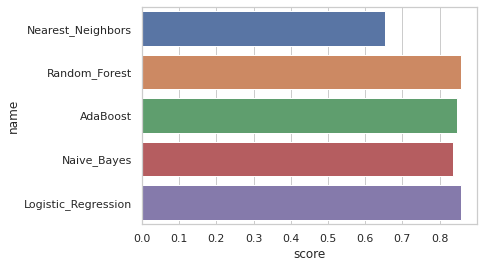

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=dataframe)

In [99]:
#hyper_parameter tuning
#max_features_range = np.arange(1,6,1)
#n_estimators_range = np.arange(10,210,10)
#param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

#rf = RandomForestClassifier()

#grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)

In [100]:
#grid.fit(train_matrix, target)

In [101]:
#print("The best parameters are %s with a score of %0.2f"
#% (grid.best_params_, grid.best_score_))

In [102]:
#import pandas as pd

#grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
#grid_results.head()